# Airbnb Price Prediction Project - Data Exploration

## Setup and Data Loading

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Plot configuration
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Load datasets
train_data = pd.read_csv('airbnb_train.csv')
test_data = pd.read_csv('airbnb_test.csv')

print("Dataset Information:")
print(f"Training set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")

Dataset Information:
Training set shape: (22234, 28)
Test set shape: (51877, 27)


## 1. Dataset Overview

In [23]:
# Basic informations
print("=== TRAINING DATASET INFO ===")
print(train_data.info())
print("\n=== FIRST FEW ROWS ===")
display(train_data.head())

=== TRAINING DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      22234 non-null  int64         
 1   log_price               22234 non-null  float64       
 2   property_type           22234 non-null  object        
 3   room_type               22234 non-null  object        
 4   amenities               22234 non-null  object        
 5   accommodates            22234 non-null  int64         
 6   bathrooms               22183 non-null  float64       
 7   bed_type                22234 non-null  object        
 8   cancellation_policy     22234 non-null  object        
 9   cleaning_fee            22234 non-null  bool          
 10  city                    22234 non-null  object        
 11  description             22234 non-null  object        
 12  first_review    

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,bedrooms,beds,description_length,amenities_count,first_review_year,first_review_month,last_review_year,last_review_month,host_since_year,host_since_month
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,...,0.0,2.0,669,15,NaN,NaN,NaN,NaN,2015.0,12.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,...,1.0,2.0,1000,25,2017.0,5.0,2017.0,9.0,2016.0,11.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,...,2.0,2.0,494,20,NaN,NaN,NaN,NaN,2016.0,12.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,...,1.0,1.0,1000,30,2016.0,10.0,2017.0,9.0,2012.0,8.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,...,2.0,2.0,1000,24,2016.0,9.0,2017.0,8.0,2013.0,7.0


**Key observations:** 

- 22,234 listings with 36 features. 
- Several variables have missing values, notably review-related features (~21% missing) and host information (~0.3% missing). 
- The dataset includes a mix of numerical, categorical, and temporal variables.


In [22]:
# Descriptive statistics
print("=== DESCRIPTIVE STATISTICS ===")
display(train_data.describe())

=== DESCRIPTIVE STATISTICS ===


,id,log_price,accommodates,bathrooms,first_review,host_since,last_review,latitude,longitude,number_of_reviews,...,bedrooms,beds,description_length,amenities_count,first_review_year,first_review_month,last_review_year,last_review_month,host_since_year,host_since_month
count,2.223400e+04,22234.000000,22234.000000,22183.000000,17509,22178,17518,22234.000000,22234.000000,22234.000000,...,22208.000000,22199.000000,22234.000000,22234.000000,17509.000000,17509.000000,17518.000000,17518.000000,22178.000000,22178.000000
mean,1.122269e+07,4.783481,3.155573,1.236037,2016-01-15 02:25:44.120166912,2014-07-21 19:14:18.688790528,2017-03-15 14:22:02.616737280,38.462971,-92.269305,20.670774,...,1.264769,1.711473,764.743816,17.661464,2015.538523,6.537152,2016.691517,6.632207,2014.051763,6.555145
min,3.362000e+03,2.302585,1.000000,0.000000,2009-05-25 00:00:00,2008-03-03 00:00:00,2010-07-17 00:00:00,33.339002,-122.510940,0.000000,...,0.000000,0.000000,1.000000,1.000000,2009.000000,1.000000,2010.000000,1.000000,2008.000000,1.000000
25%,6.202924e+06,4.317488,2.000000,1.000000,2015-07-01 00:00:00,2013-04-24 06:00:00,2017-01-10 00:00:00,34.136082,-118.340633,1.000000,...,1.000000,1.000000,482.000000,13.000000,2015.000000,4.000000,2017.000000,4.000000,2013.000000,4.000000
50%,1.217425e+07,4.700480,2.000000,1.000000,2016-05-25 00:00:00,2014-09-29 00:00:00,2017-04-28 00:00:00,40.662632,-76.994944,6.000000,...,1.000000,1.000000,1000.000000,17.000000,2016.000000,7.000000,2017.000000,7.000000,2014.000000,7.000000
75%,1.639502e+07,5.220356,4.000000,1.000000,2017-01-02 00:00:00,2015-12-26 00:00:00,2017-09-09 00:00:00,40.746358,-73.954599,23.000000,...,1.000000,2.000000,1000.000000,22.000000,2017.000000,9.000000,2017.000000,9.000000,2015.000000,9.000000
max,2.120450e+07,7.600402,16.000000,8.000000,2017-10-02 00:00:00,2017-10-04 00:00:00,2017-10-05 00:00:00,42.390248,-70.989359,505.000000,...,10.000000,18.000000,1000.000000,86.000000,2017.000000,12.000000,2017.000000,12.000000,2017.000000,12.000000
std,6.080480e+06,0.718758,2.143870,0.586246,NaN,NaN,NaN,3.071679,21.670081,37.183731,...,0.852819,1.254903,316.810648,6.950820,1.395292,3.185090,0.643292,2.837629,1.842328,3.323023


**Key insights:** 

- Average log_price is 4.78 (≈119 dollars per night).
- Most listings accommodate 2-4 people with 1 bathroom and bedroom.
- Wide price range from 10 to 2000 dollars per night. Description length is often capped at 1000 characters, and listings average 18 amenities.


=== MISSING VALUES ANALYSIS ===


,Column,Missing_Count,Missing_Percentage
15,host_response_rate,5475,24.624449
24,review_scores_rating,4978,22.389134
12,first_review,4725,21.251237
18,last_review,4716,21.210758
22,neighbourhood,2086,9.382028
25,zipcode,303,1.362778
13,host_has_profile_pic,56,0.251867
14,host_identity_verified,56,0.251867
16,host_since,56,0.251867
6,bathrooms,51,0.229378


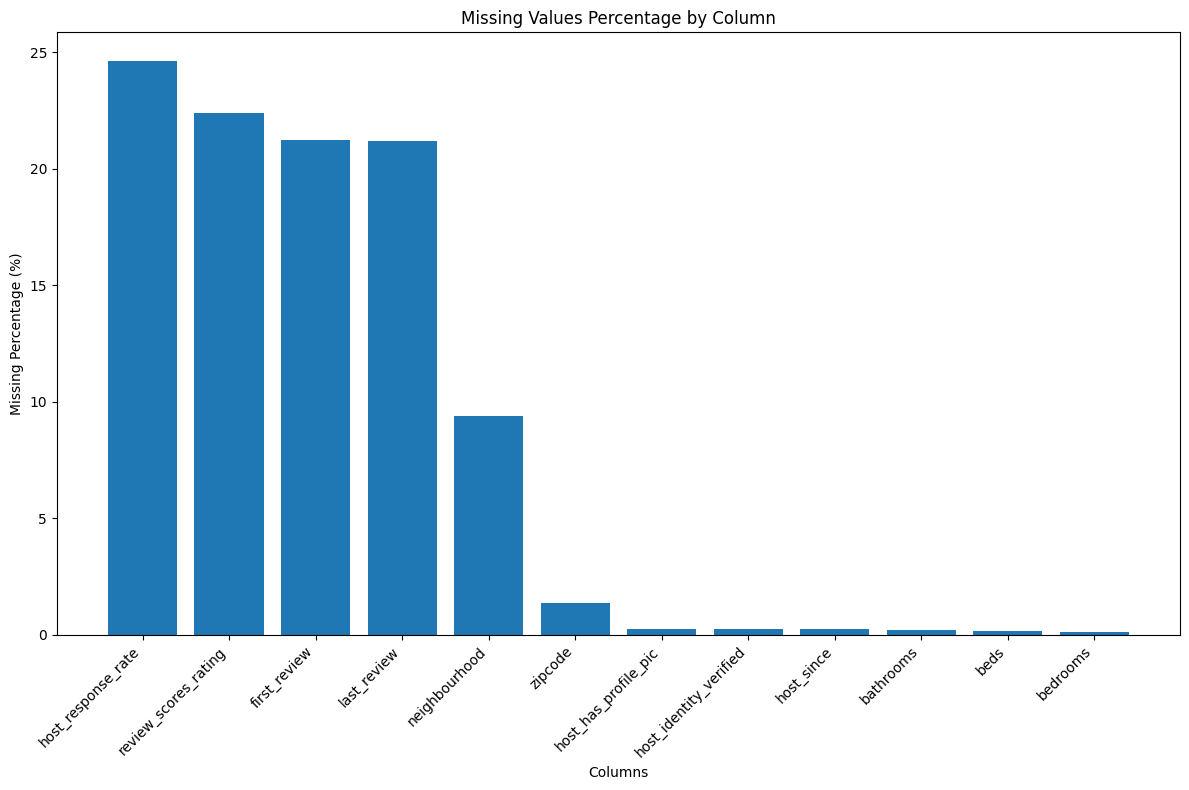

In [5]:
# Missing values analysis
print("=== MISSING VALUES ANALYSIS ===")
missing_data = train_data.isnull().sum()
missing_percentage = (missing_data / len(train_data)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
display(missing_df)

# Visualization of missing values
plt.figure(figsize=(12, 8))
if len(missing_df) > 0:
    plt.bar(missing_df['Column'], missing_df['Missing_Percentage'])
    plt.title('Missing Values Percentage by Column')
    plt.xlabel('Columns')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Missing data pattern:** 
- Review-related variables have highest missing rates (21-25%), likely from new listings without reviews yet. 
- Host information has minimal missing data (<1%), suggesting most hosts complete their profiles.
- Neighbourhood and zipcode missing rates are manageable.


## 2. Target Variable Analysis

=== TARGET VARIABLE ANALYSIS: LOG_PRICE ===
count    22234.000000
mean         4.783481
std          0.718758
min          2.302585
25%          4.317488
50%          4.700480
75%          5.220356
max          7.600402
Name: log_price, dtype: float64


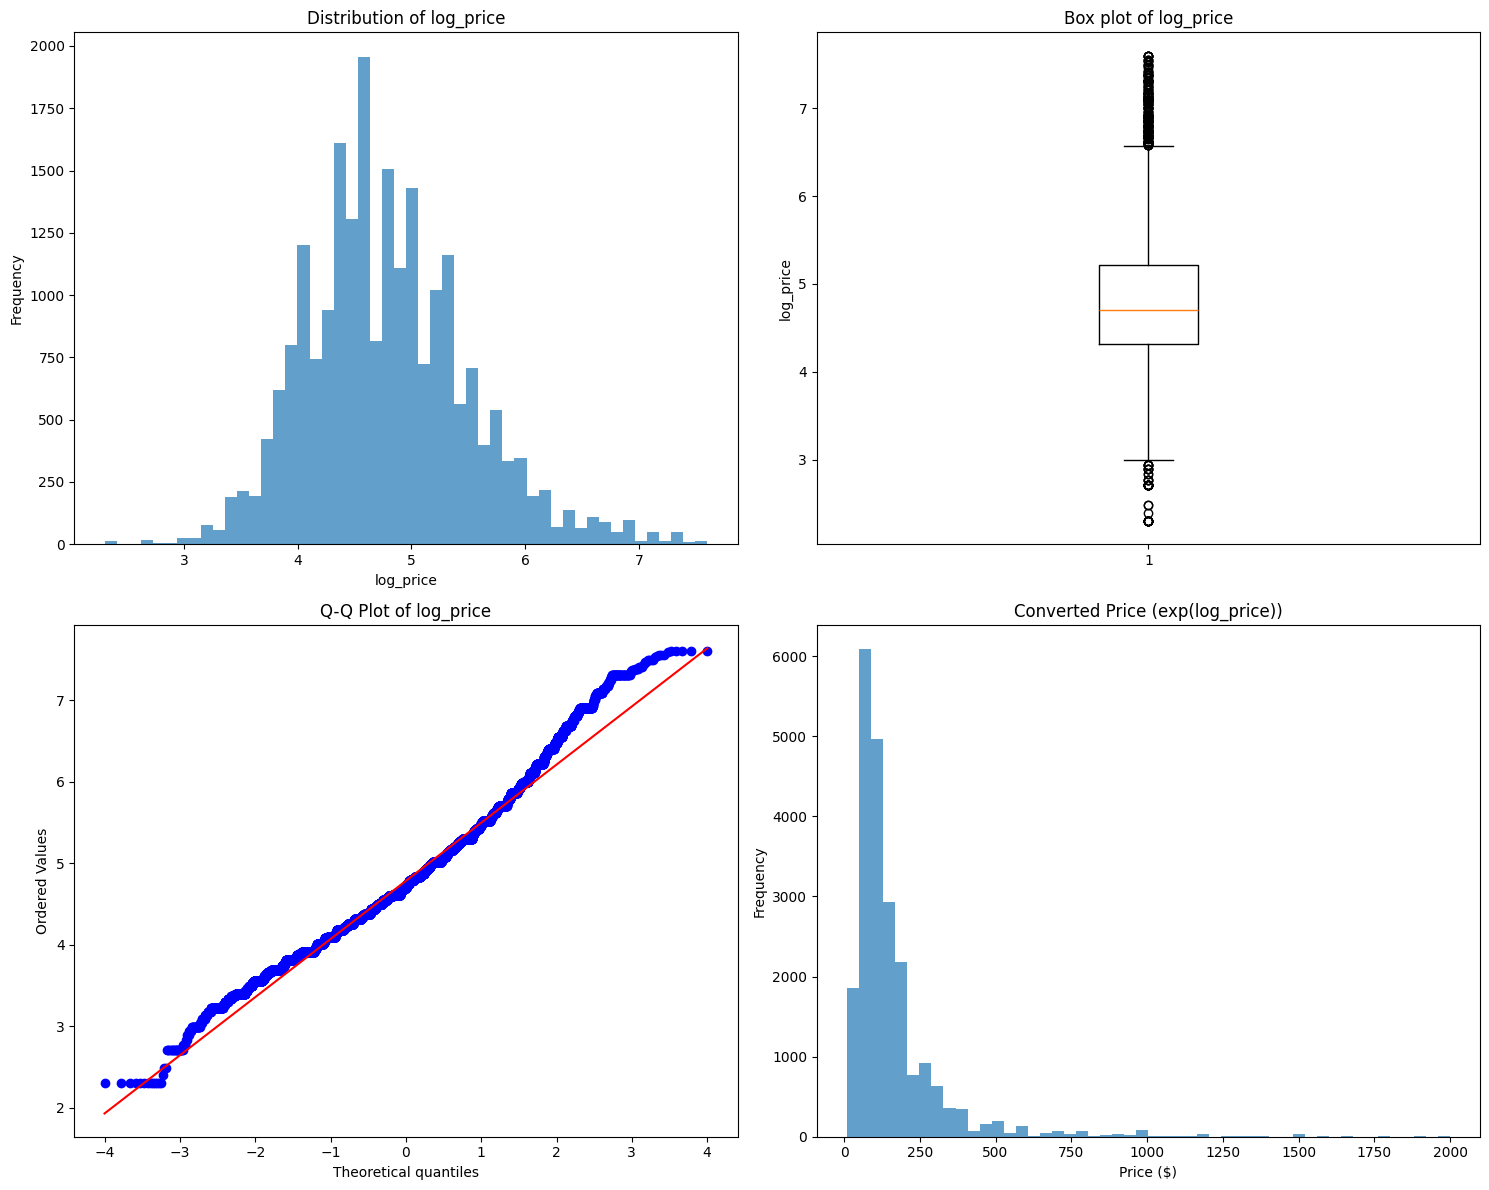

In [6]:
# Target variable distribution
print("=== TARGET VARIABLE ANALYSIS: LOG_PRICE ===")
print(train_data['log_price'].describe())

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution
axes[0,0].hist(train_data['log_price'], bins=50, alpha=0.7)
axes[0,0].set_title('Distribution of log_price')
axes[0,0].set_xlabel('log_price')
axes[0,0].set_ylabel('Frequency')

# Box plot
axes[0,1].boxplot(train_data['log_price'])
axes[0,1].set_title('Box plot of log_price')
axes[0,1].set_ylabel('log_price')

# Q-Q plot
stats.probplot(train_data['log_price'], dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot of log_price')

# Converted price
price_converted = np.exp(train_data['log_price'])
axes[1,1].hist(price_converted, bins=50, alpha=0.7)
axes[1,1].set_title('Converted Price (exp(log_price))')
axes[1,1].set_xlabel('Price ($)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Target distribution:** 
- Log_price is approximately normally distributed (good for linear models), with median ~110 dollars per night and mean ~119 dollars per night. 
- The log transformation effectively handles the right-skewed price distribution, with most listings between 75 and 185 dollars per night.


## 3. Categorical Variables Analysis

In [7]:
# Categorical variables identification
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
print("=== CATEGORICAL VARIABLES ===")
print(f"Number of categorical variables: {len(categorical_columns)}")
print(f"Variables: {categorical_columns}")

print("\n=== UNIQUE VALUES COUNT ===")
for col in categorical_columns:
    unique_count = train_data[col].nunique()
    print(f"{col}: {unique_count} unique values")

=== CATEGORICAL VARIABLES ===
Number of categorical variables: 17
Variables: ['property_type', 'room_type', 'amenities', 'bed_type', 'cancellation_policy', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'name', 'neighbourhood', 'zipcode']

=== UNIQUE VALUES COUNT ===
property_type: 31 unique values
room_type: 3 unique values
amenities: 21160 unique values
bed_type: 5 unique values
cancellation_policy: 5 unique values
city: 6 unique values
description: 22169 unique values
first_review: 2096 unique values
host_has_profile_pic: 2 unique values
host_identity_verified: 2 unique values
host_response_rate: 70 unique values
host_since: 2852 unique values
instant_bookable: 2 unique values
last_review: 1042 unique values
name: 22155 unique values
neighbourhood: 558 unique values
zipcode: 674 unique values


**Variable cardinality:** 
- High-cardinality features like amenities (21K unique) and descriptions (22K unique) will need special encoding. 
- Low-cardinality features like room_type (3), bed_type (5), and binary variables are ready for standard encoding. 
- Medium-cardinality features like neighbourhood (558) may benefit from target encoding.


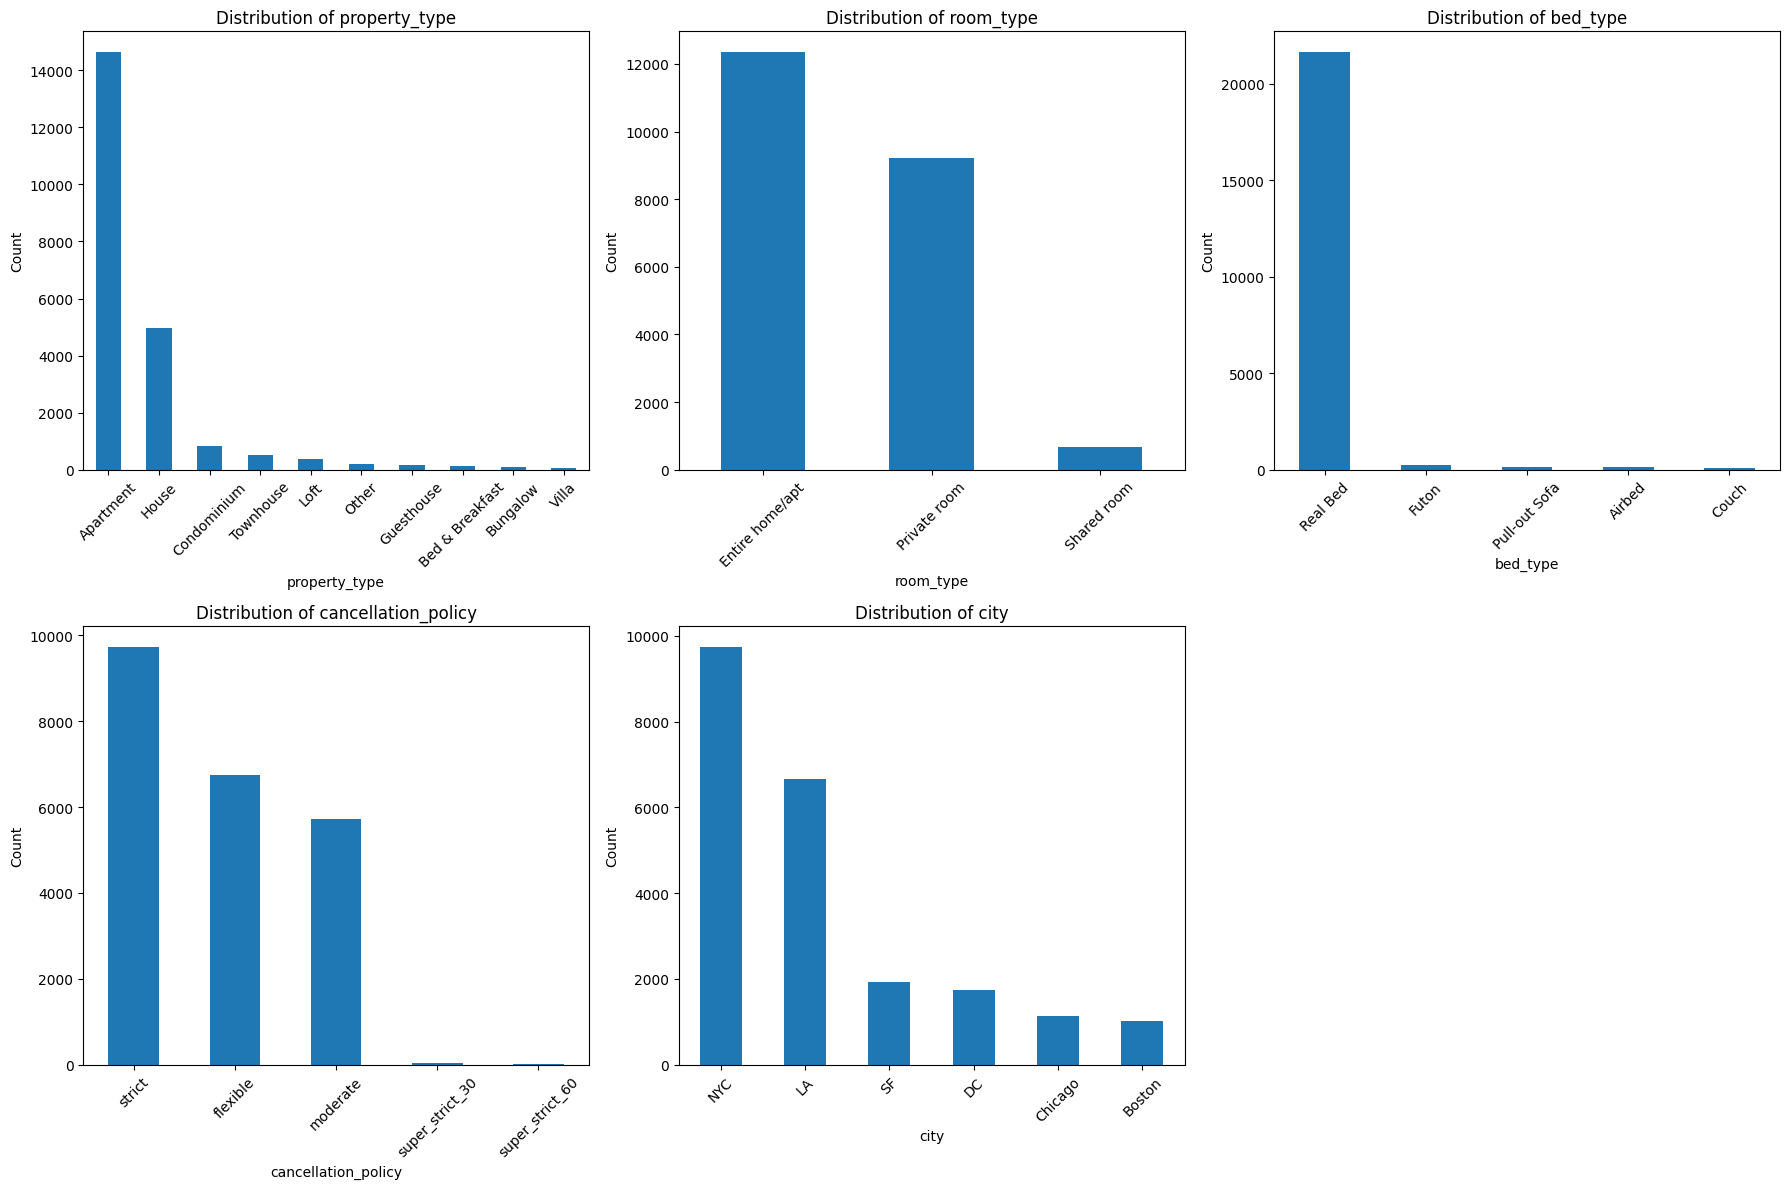

In [8]:
# Distribution of main categorical variables
main_categorical = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(main_categorical):
    if col in train_data.columns:
        value_counts = train_data[col].value_counts().head(10)
        value_counts.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

if len(main_categorical) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

=== CATEGORICAL VARIABLES vs LOG_PRICE ===


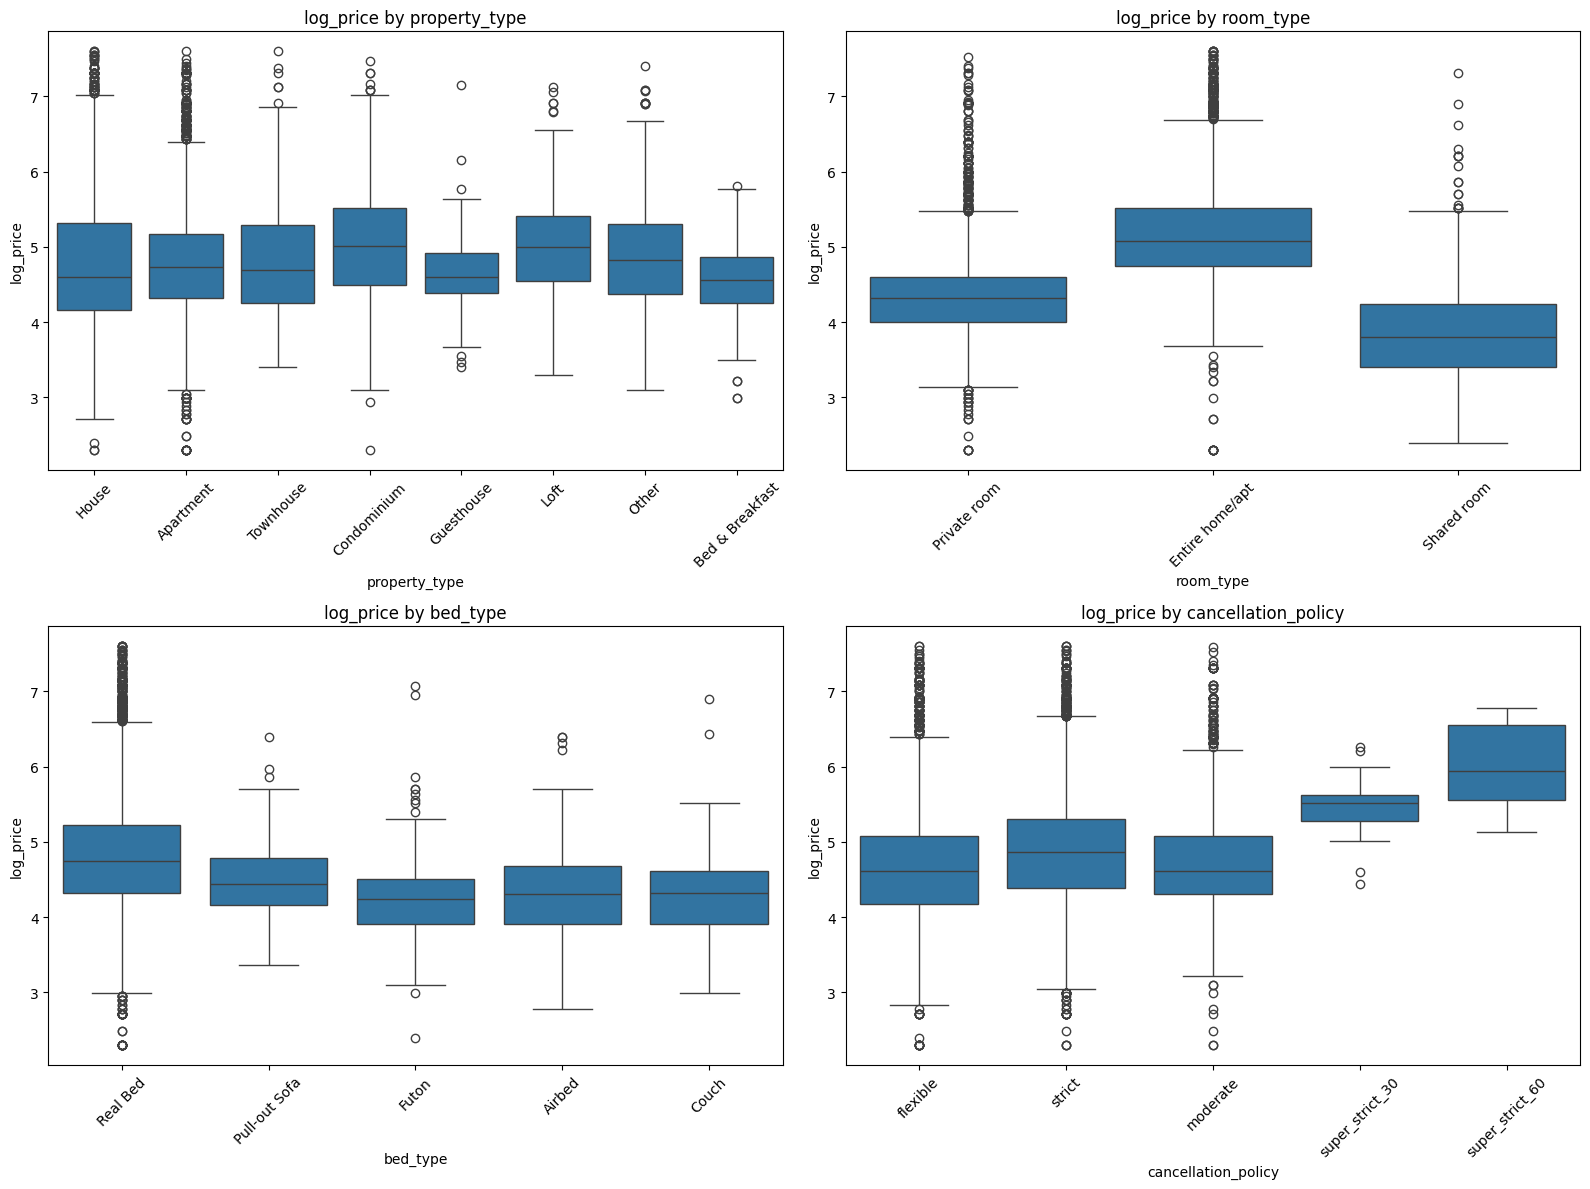

In [9]:
# Categorical variables vs log_price
print("=== CATEGORICAL VARIABLES vs LOG_PRICE ===")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

categorical_for_analysis = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']

for i, col in enumerate(categorical_for_analysis):
    if col in train_data.columns:
        top_categories = train_data[col].value_counts().head(8).index
        data_filtered = train_data[train_data[col].isin(top_categories)]
        
        sns.boxplot(data=data_filtered, x=col, y='log_price', ax=axes[i])
        axes[i].set_title(f'log_price by {col}')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Price impact by categories:** 
- Room type shows strongest price differentiation (Entire home/apt > Private room > Shared room). 
- Stricter cancellation policies correlate with higher prices. 
- Property type and bed type show more modest price variations, with Condominiums and Real Beds slightly commanding higher prices.


## 4. Numerical Variables Analysis

In [10]:
# Numerical variables
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'log_price' in numerical_columns:
    numerical_columns.remove('log_price')
if 'id' in numerical_columns:
    numerical_columns.remove('id')

print("=== NUMERICAL VARIABLES ===")
print(f"Number of numerical variables: {len(numerical_columns)}")
print(f"Variables: {numerical_columns}")

print("\n=== NUMERICAL VARIABLES STATISTICS ===")
display(train_data[numerical_columns].describe())

=== NUMERICAL VARIABLES ===
Number of numerical variables: 8
Variables: ['accommodates', 'bathrooms', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

=== NUMERICAL VARIABLES STATISTICS ===


,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,22234.000000,22183.000000,22234.000000,22234.000000,22234.000000,17256.000000,22208.000000,22199.000000
mean,3.155573,1.236037,38.462971,-92.269305,20.670774,94.069077,1.264769,1.711473
std,2.143870,0.586246,3.071679,21.670081,37.183731,7.782235,0.852819,1.254903
min,1.000000,0.000000,33.339002,-122.510940,0.000000,20.000000,0.000000,0.000000
25%,2.000000,1.000000,34.136082,-118.340633,1.000000,92.000000,1.000000,1.000000
50%,2.000000,1.000000,40.662632,-76.994944,6.000000,96.000000,1.000000,1.000000
75%,4.000000,1.000000,40.746358,-73.954599,23.000000,100.000000,1.000000,2.000000
max,16.000000,8.000000,42.390248,-70.989359,505.000000,100.000000,10.000000,18.000000


**Numerical features insights:** 
- Most listings are small (median 2 guests, 1 bedroom/bathroom). 
- Review scores are high-skewed (median 96/100), suggesting satisfied customers or rating bias. 
- Geographic spread covers US coasts. 
- Number of reviews varies widely (0-505), indicating mix of new and established listings.


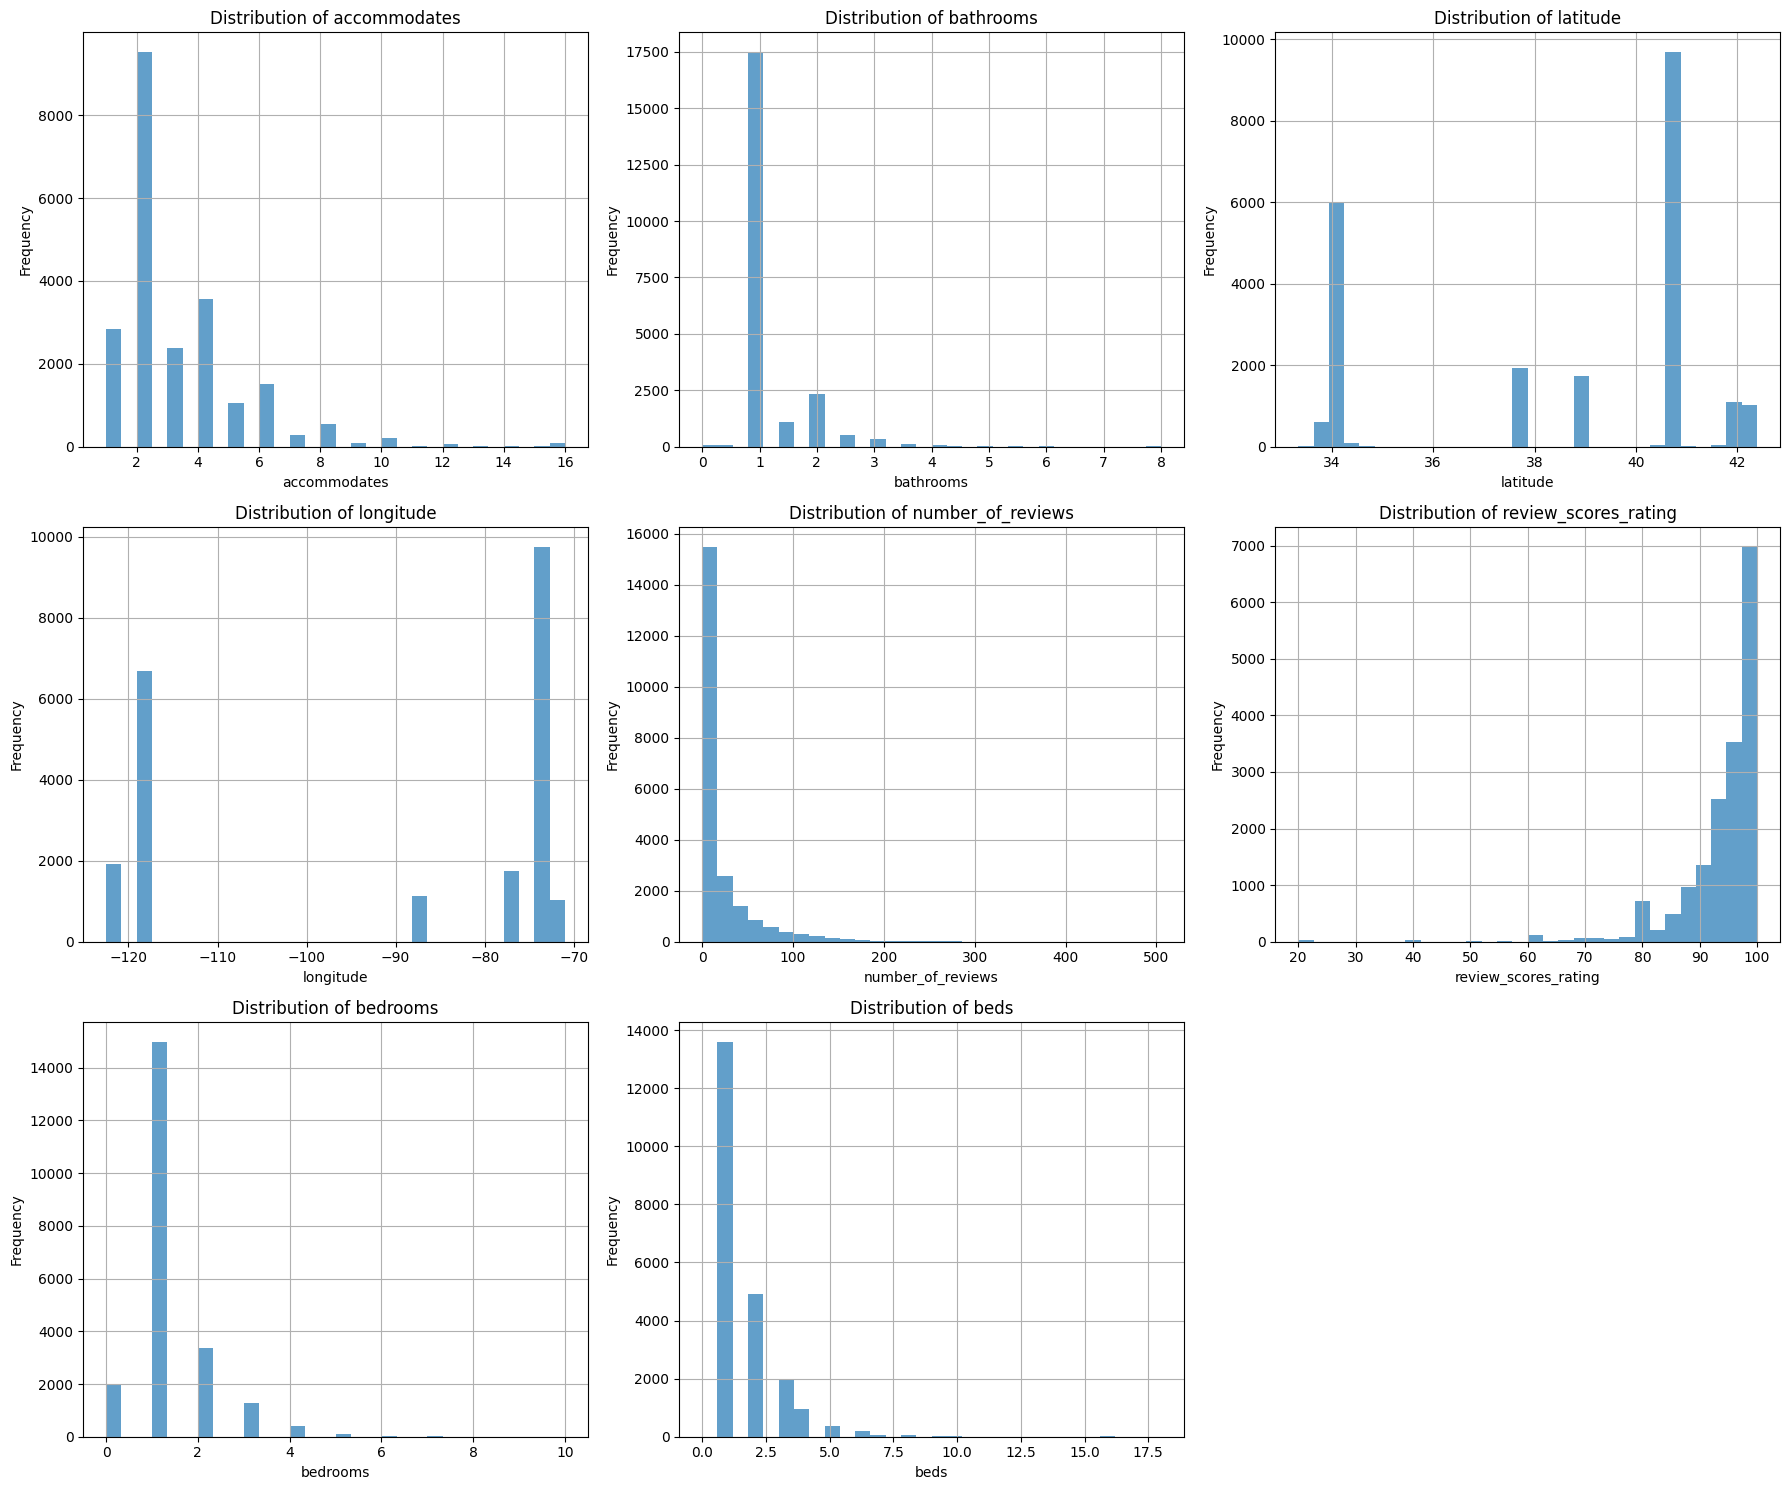

In [11]:
# Distribution of numerical variables
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_columns[:9]):
    if col in train_data.columns:
        train_data[col].hist(bins=30, ax=axes[i], alpha=0.7)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

for j in range(i+1, 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

=== CORRELATIONS WITH LOG_PRICE ===
log_price               1.000000
accommodates            0.564874
bedrooms                0.472871
beds                    0.435212
bathrooms               0.369118
review_scores_rating    0.092342
latitude                0.005231
number_of_reviews      -0.039138
longitude              -0.045348
Name: log_price, dtype: float64


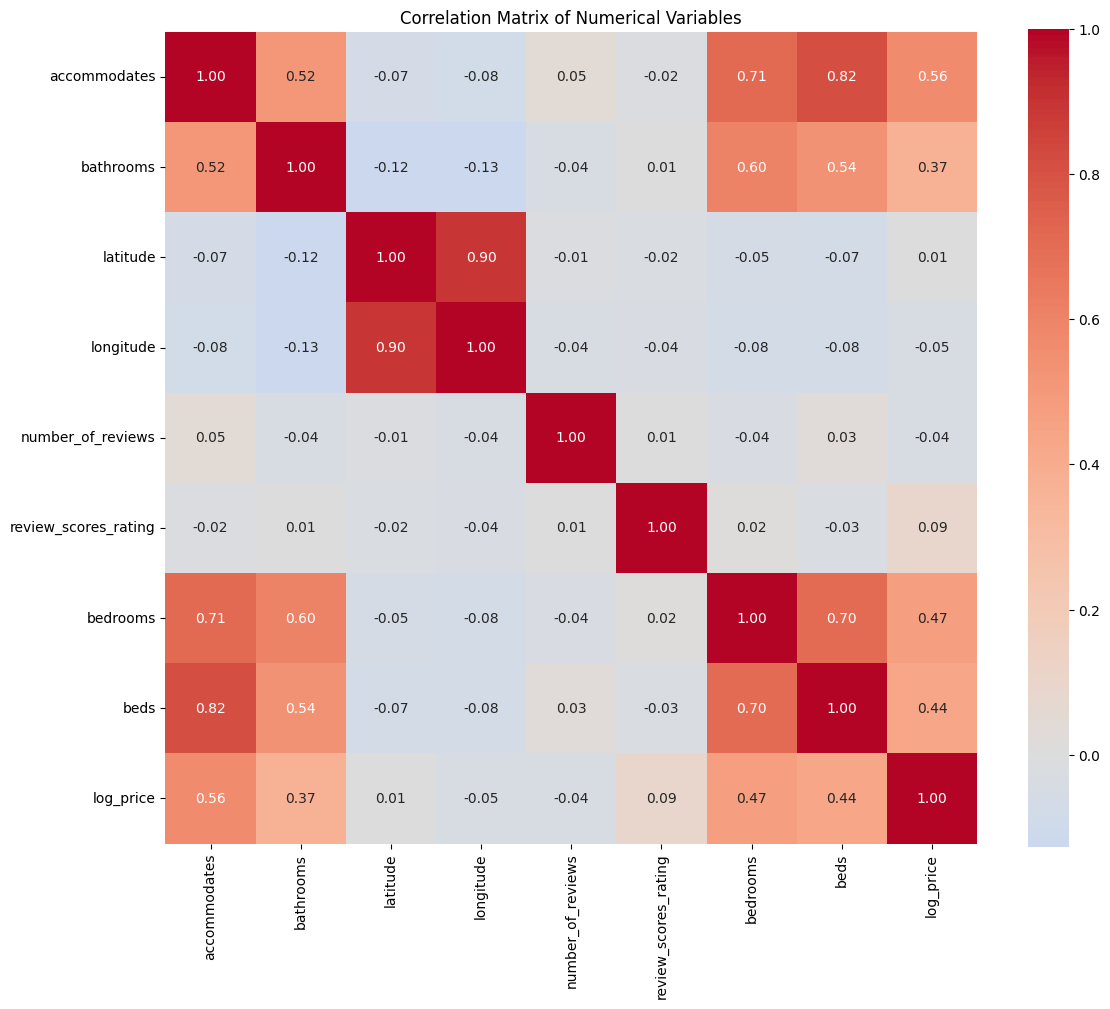

In [12]:
# Correlations with log_price
print("=== CORRELATIONS WITH LOG_PRICE ===")
correlations = train_data[numerical_columns + ['log_price']].corr()['log_price'].sort_values(ascending=False)
print(correlations)

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = train_data[numerical_columns + ['log_price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

**Key correlations:** 
- Strongest predictors are property size features - accommodates (0.56), bedrooms (0.47), beds (0.44), and bathrooms (0.37).
- Geographic coordinates show minimal correlation with price. 
- Surprisingly, review scores and number of reviews have weak/negative correlations, suggesting price isn't driven by guest satisfaction.


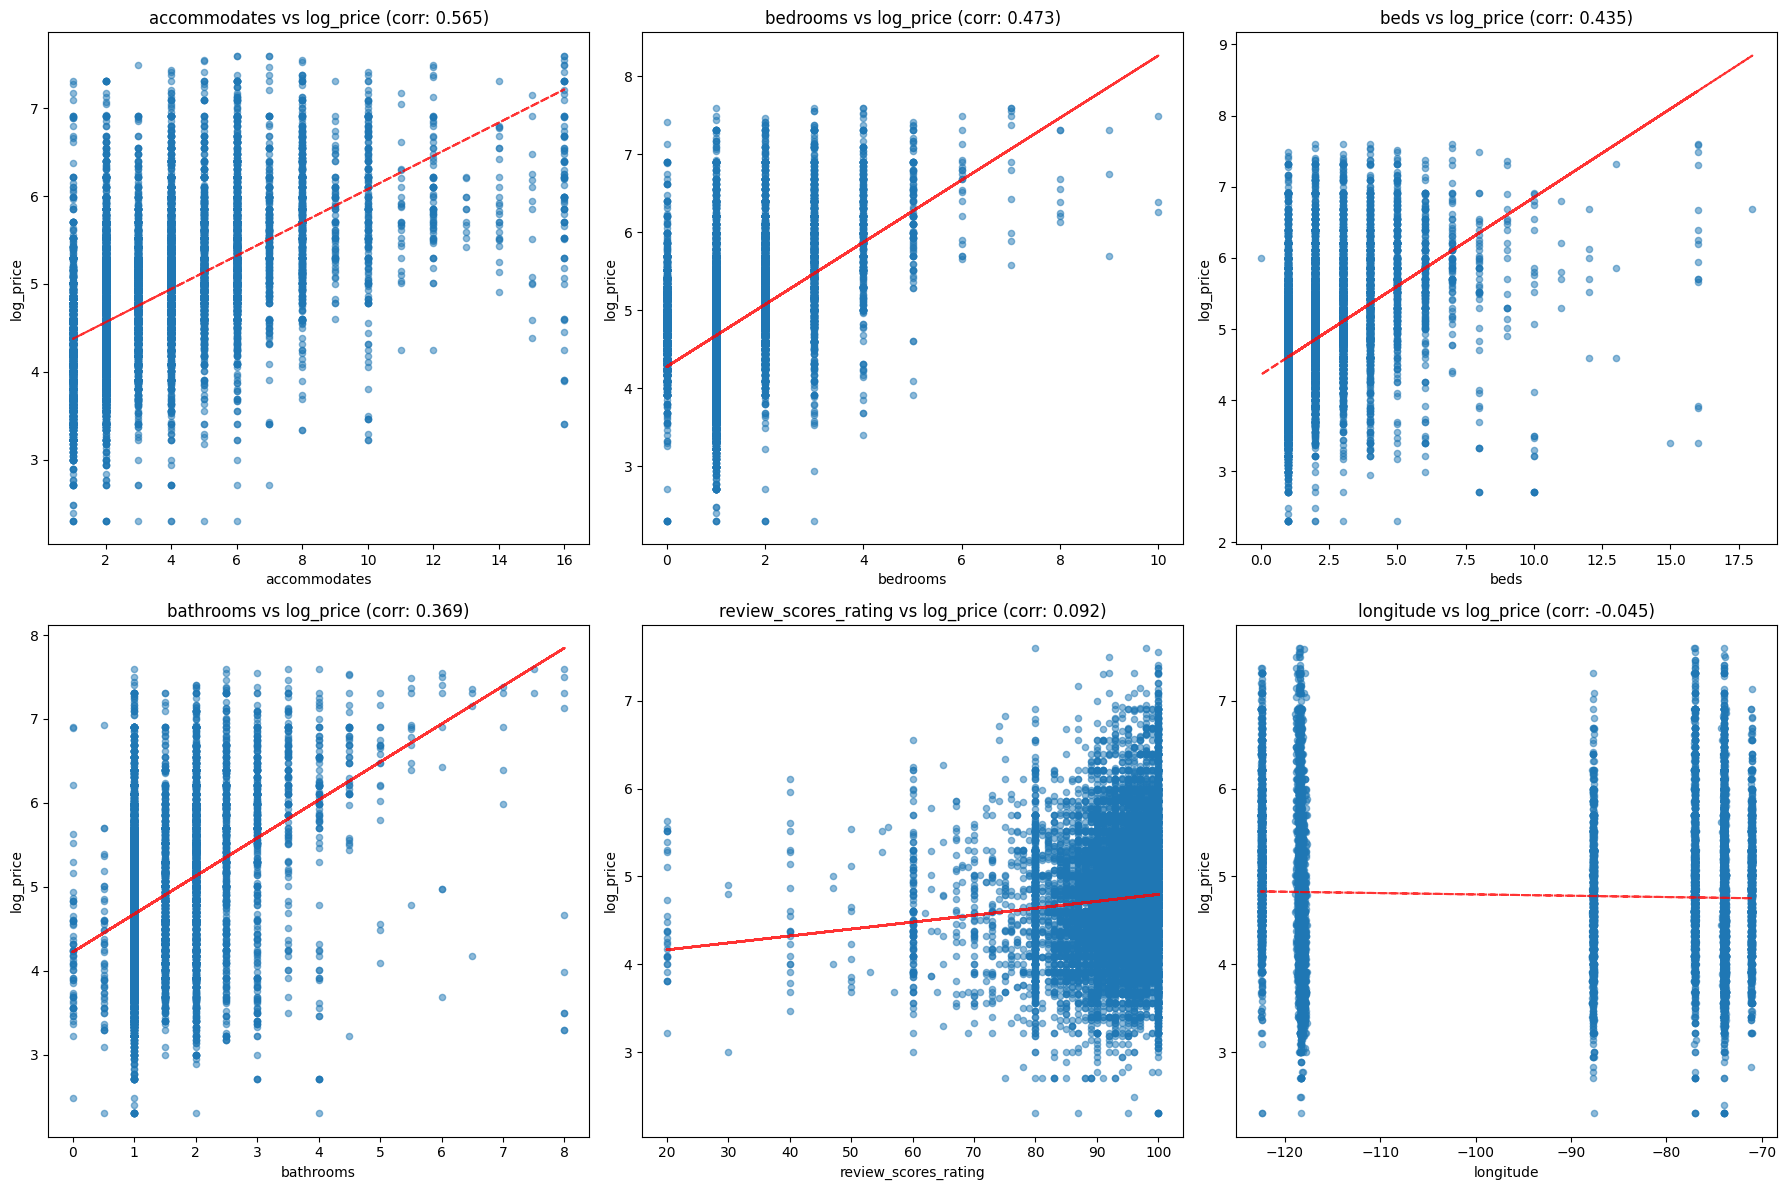

In [13]:
# Scatter plots of most correlated variables
top_corr_vars = correlations.abs().sort_values(ascending=False)[1:7].index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(top_corr_vars):
    axes[i].scatter(train_data[var], train_data['log_price'], alpha=0.5, s=20)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('log_price')
    axes[i].set_title(f'{var} vs log_price (corr: {correlations[var]:.3f})')
    
    # Trend line
    z = np.polyfit(train_data[var].dropna(), 
                   train_data['log_price'][train_data[var].notna()], 1)
    p = np.poly1d(z)
    axes[i].plot(train_data[var], p(train_data[var]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

## 5. Geographic Analysis

=== GEOGRAPHIC ANALYSIS ===
Latitude range: 33.3390 to 42.3902
Longitude range: -122.5109 to -70.9894


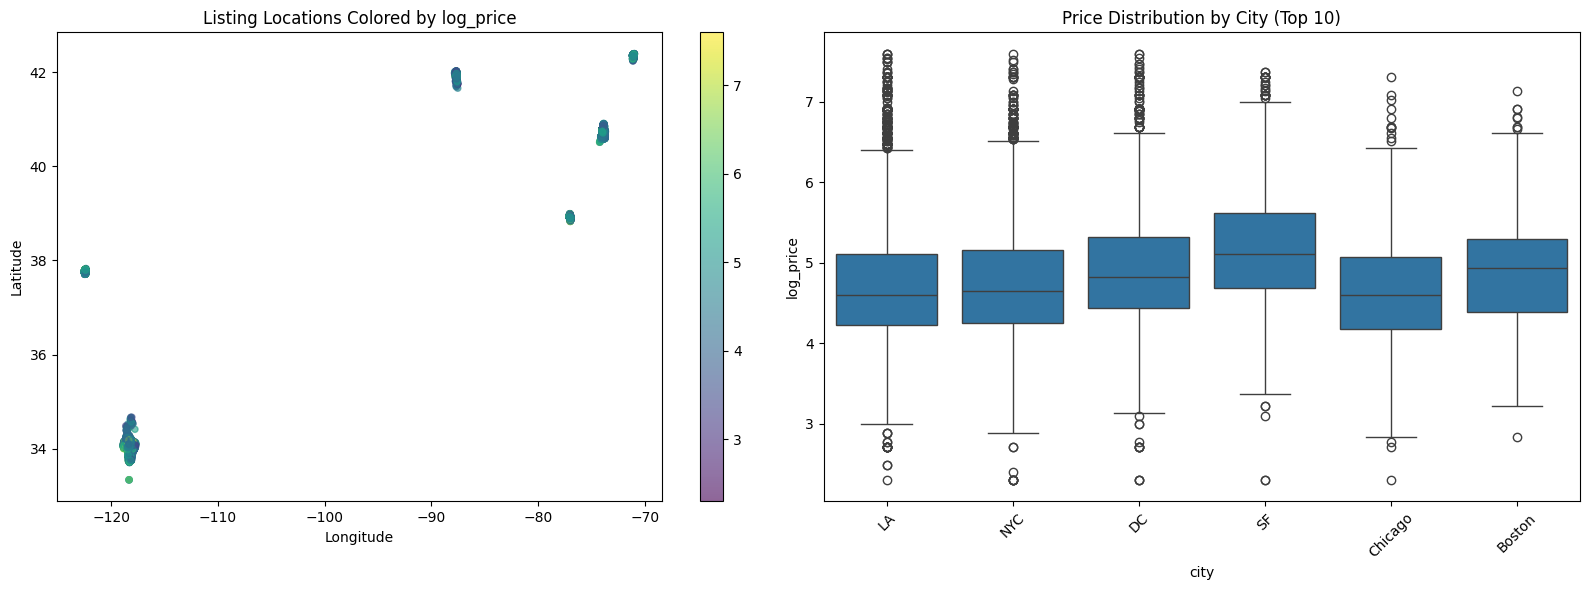

In [14]:
# Geographic analysis
print("=== GEOGRAPHIC ANALYSIS ===")
print(f"Latitude range: {train_data['latitude'].min():.4f} to {train_data['latitude'].max():.4f}")
print(f"Longitude range: {train_data['longitude'].min():.4f} to {train_data['longitude'].max():.4f}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Location scatter plot
scatter = axes[0].scatter(train_data['longitude'], train_data['latitude'], 
                         c=train_data['log_price'], cmap='viridis', alpha=0.6, s=20)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Listing Locations Colored by log_price')
plt.colorbar(scatter, ax=axes[0])

# Price distribution by city
if 'city' in train_data.columns:
    top_cities = train_data['city'].value_counts().head(10).index
    city_data = train_data[train_data['city'].isin(top_cities)]
    sns.boxplot(data=city_data, x='city', y='log_price', ax=axes[1])
    axes[1].set_title('Price Distribution by City (Top 10)')
    axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Geographic insights:** 
- Data spans major US cities from West Coast (CA) to East Coast (MA/NY).
- Higher prices appear concentrated in certain coastal areas.
- SF shows highest median prices, followed by DC and NYC, while Chicago and Boston have more moderate pricing despite being major cities.


## 6. Text Variables Analysis

=== TEXT VARIABLES ANALYSIS ===
Average description length: 765 characters
Description length vs log_price correlation: 0.048
Average number of amenities: 17.7
Amenities count vs log_price correlation: 0.198


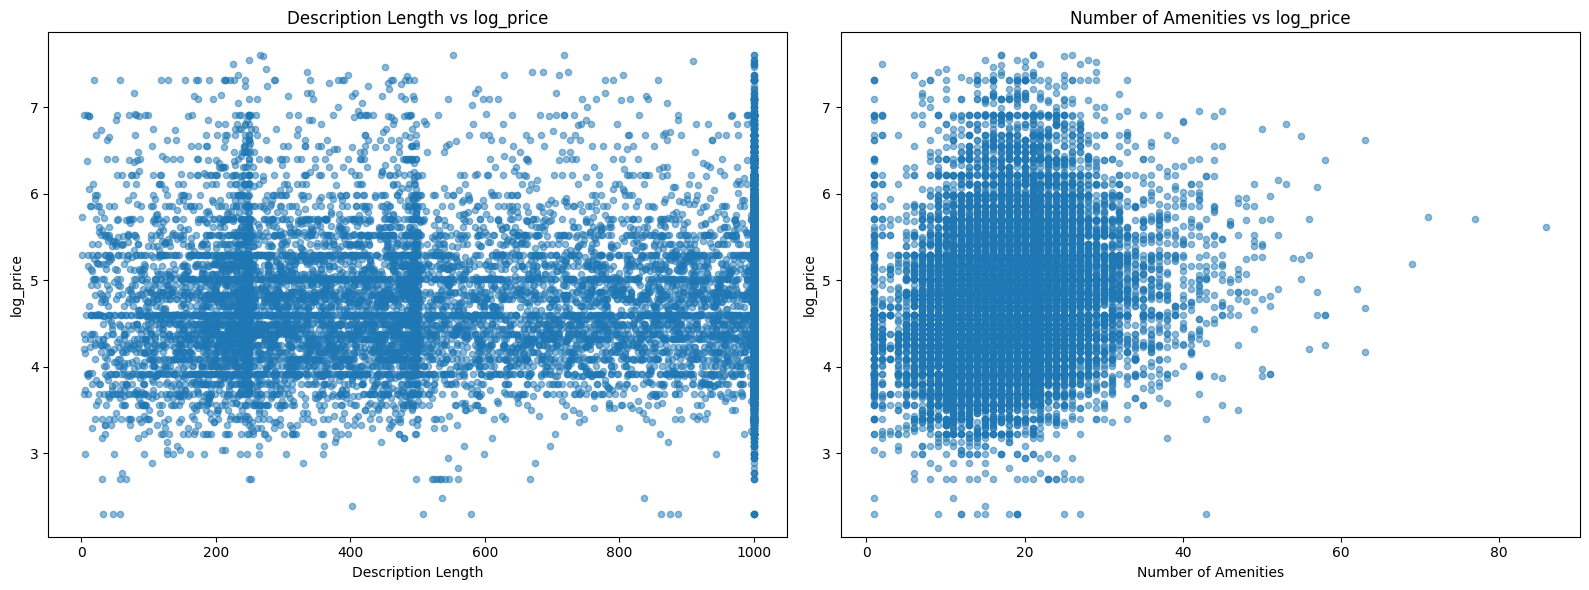

In [15]:
# Text variables analysis
print("=== TEXT VARIABLES ANALYSIS ===")

# Description analysis
if 'description' in train_data.columns:
    train_data['description_length'] = train_data['description'].astype(str).str.len()
    print(f"Average description length: {train_data['description_length'].mean():.0f} characters")
    print(f"Description length vs log_price correlation: {train_data['description_length'].corr(train_data['log_price']):.3f}")

# Amenities analysis
if 'amenities' in train_data.columns:
    train_data['amenities_count'] = train_data['amenities'].astype(str).str.count(',') + 1
    print(f"Average number of amenities: {train_data['amenities_count'].mean():.1f}")
    print(f"Amenities count vs log_price correlation: {train_data['amenities_count'].corr(train_data['log_price']):.3f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

if 'description' in train_data.columns:
    axes[0].scatter(train_data['description_length'], train_data['log_price'], alpha=0.5, s=20)
    axes[0].set_xlabel('Description Length')
    axes[0].set_ylabel('log_price')
    axes[0].set_title('Description Length vs log_price')

if 'amenities' in train_data.columns:
    axes[1].scatter(train_data['amenities_count'], train_data['log_price'], alpha=0.5, s=20)
    axes[1].set_xlabel('Number of Amenities')
    axes[1].set_ylabel('log_price')
    axes[1].set_title('Number of Amenities vs log_price')

plt.tight_layout()
plt.show()

**Text features insights:** 
- Number of amenities shows moderate positive correlation with price (0.198), suggesting more amenities justify higher rates.
- Description length has minimal impact on price (0.048).
- Many descriptions hit the 1000-character limit, indicating potential text truncation in the dataset.


## 7. Temporal Variables Analysis

In [16]:
# Date variables analysis
print("=== TEMPORAL VARIABLES ANALYSIS ===")

date_columns = ['first_review', 'last_review', 'host_since']

for col in date_columns:
    if col in train_data.columns:
        train_data[col] = pd.to_datetime(train_data[col], errors='coerce')
        
        print(f"\n{col}:")
        print(f"  - First date: {train_data[col].min()}")
        print(f"  - Last date: {train_data[col].max()}")
        print(f"  - Missing values: {train_data[col].isnull().sum()}")
        
        # Create temporal features
        train_data[f'{col}_year'] = train_data[col].dt.year
        train_data[f'{col}_month'] = train_data[col].dt.month

=== TEMPORAL VARIABLES ANALYSIS ===

first_review:
  - First date: 2009-05-25 00:00:00
  - Last date: 2017-10-02 00:00:00
  - Missing values: 4725

last_review:
  - First date: 2010-07-17 00:00:00
  - Last date: 2017-10-05 00:00:00
  - Missing values: 4716

host_since:
  - First date: 2008-03-03 00:00:00
  - Last date: 2017-10-04 00:00:00
  - Missing values: 56


**Temporal patterns:** 
- Dataset spans ~9 years (2008-2017) with review data from 2009-2017.
- Missing review dates (21%) align with listings that haven't received reviews yet.
- Host registration dates show platform growth over time, with most hosts joining after 2013.


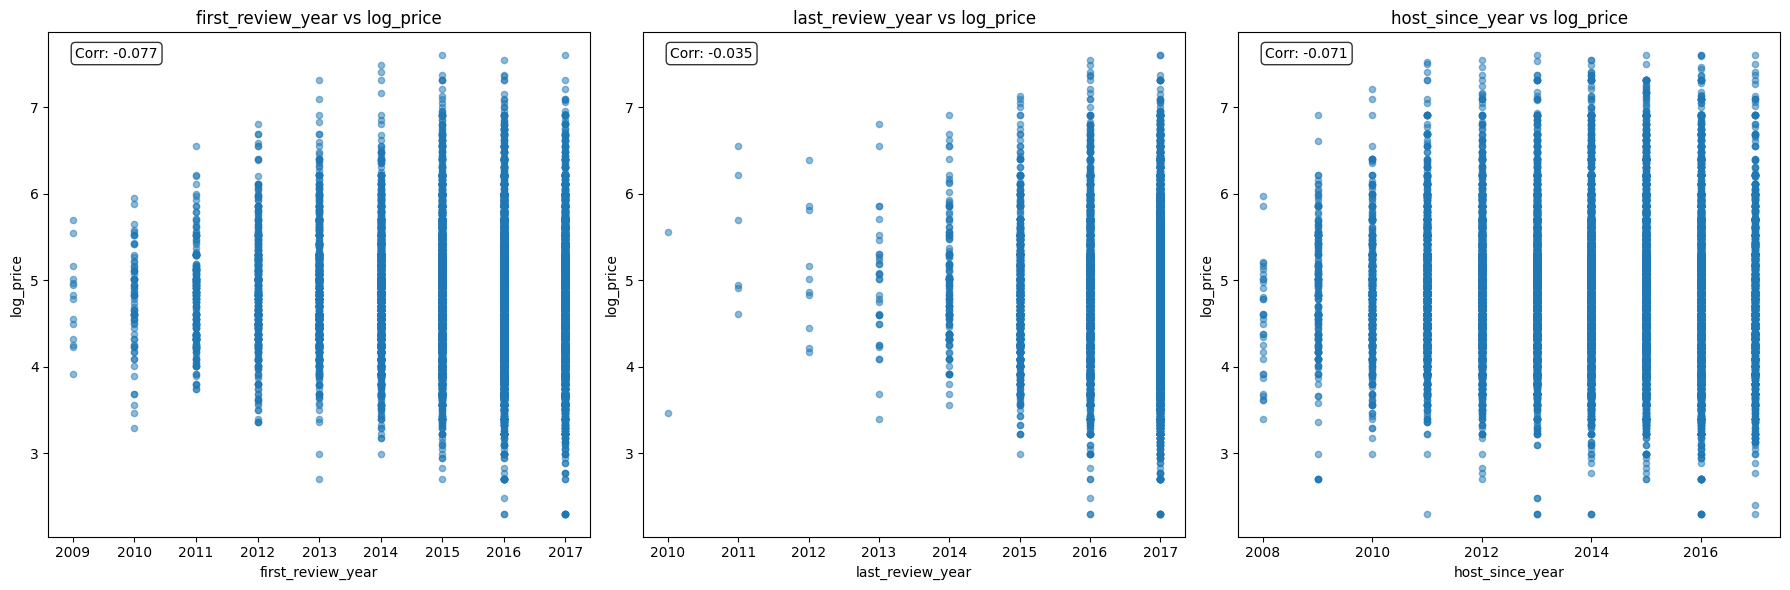

In [17]:
# Temporal trends visualization
temporal_features = [col for col in train_data.columns if '_year' in col]

if temporal_features:
    fig, axes = plt.subplots(1, len(temporal_features), figsize=(6*len(temporal_features), 6))
    if len(temporal_features) == 1:
        axes = [axes]
    
    for i, feature in enumerate(temporal_features):
        data_clean = train_data[[feature, 'log_price']].dropna()
        axes[i].scatter(data_clean[feature], data_clean['log_price'], alpha=0.5, s=20)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('log_price')
        axes[i].set_title(f'{feature} vs log_price')
        
        corr = data_clean[feature].corr(data_clean['log_price'])
        axes[i].text(0.05, 0.95, f'Corr: {corr:.3f}', transform=axes[i].transAxes, 
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    plt.tight_layout()
    plt.show()

## 8. Outlier Detection

=== OUTLIER DETECTION ===
accommodates: 1083 outliers (4.9%)
bathrooms: 4695 outliers (21.1%)
bedrooms: 7236 outliers (32.5%)
beds: 1723 outliers (7.7%)
number_of_reviews: 2433 outliers (10.9%)


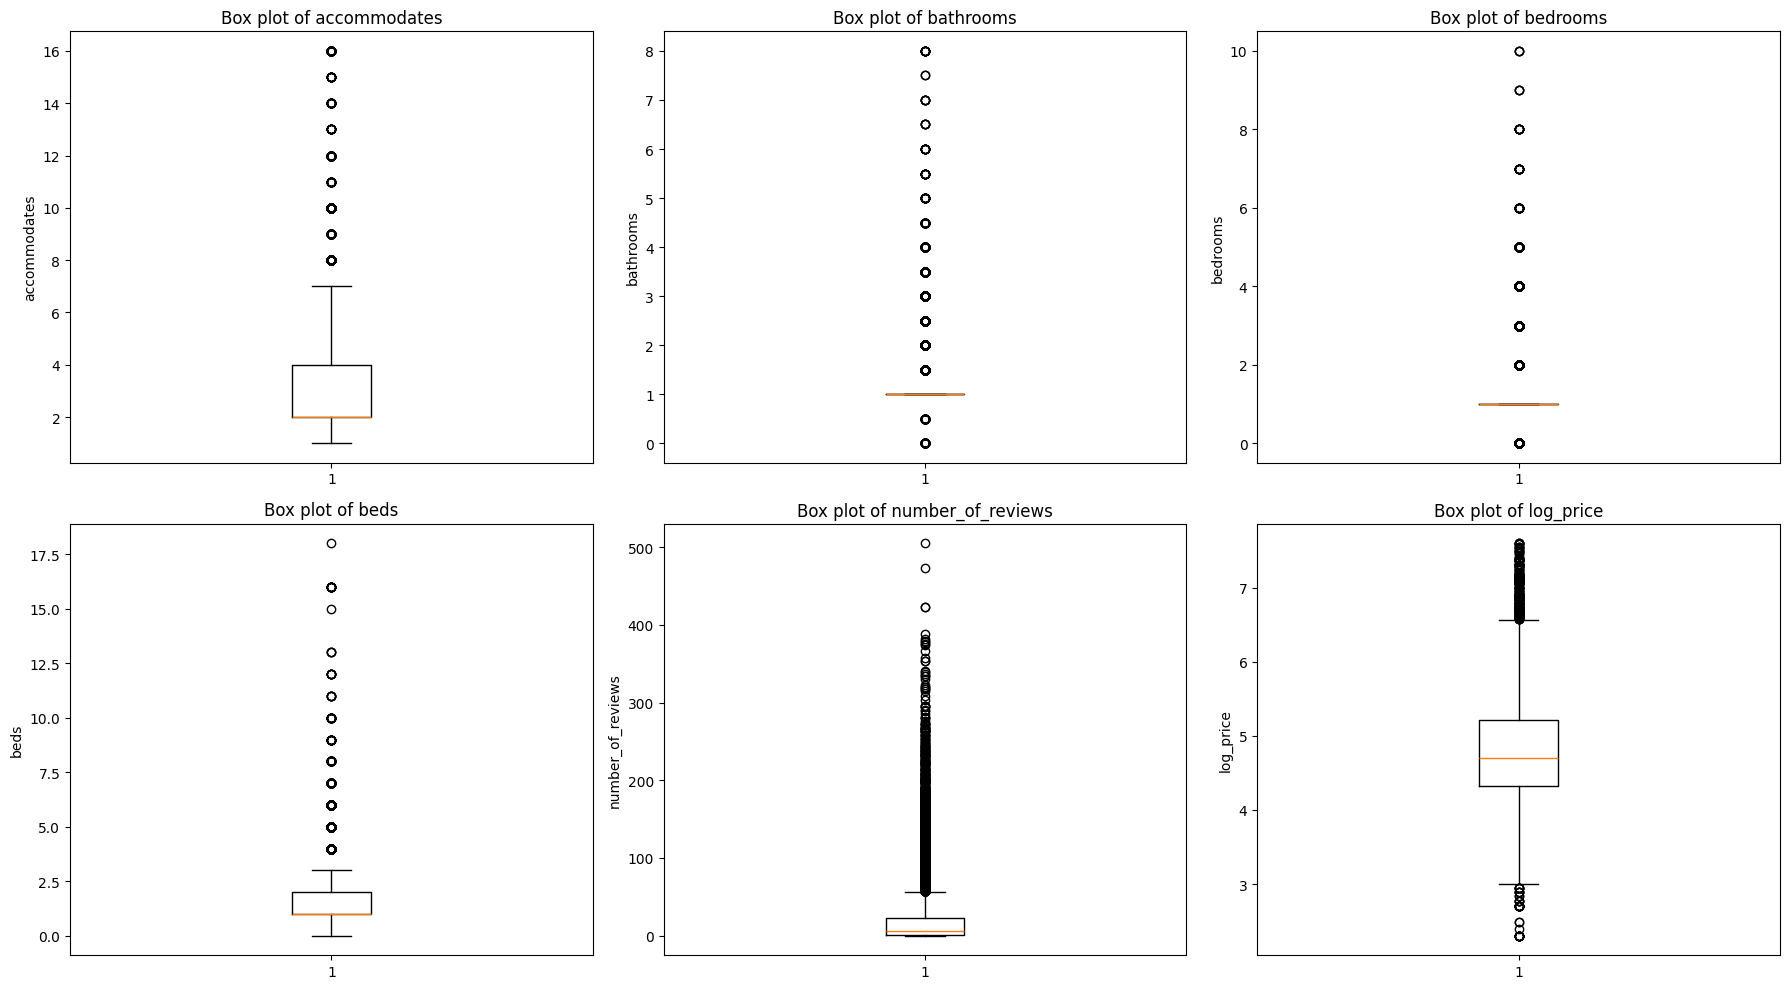

In [19]:
# Outlier detection
print("=== OUTLIER DETECTION ===")

important_numerical = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews']

for col in important_numerical:
    if col in train_data.columns:
        Q1 = train_data[col].quantile(0.25)
        Q3 = train_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = train_data[(train_data[col] < lower_bound) | (train_data[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(train_data)*100:.1f}%)")

# Outlier visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(important_numerical + ['log_price']):
    if col in train_data.columns and i < 6:
        axes[i].boxplot(train_data[col].dropna())
        axes[i].set_title(f'Box plot of {col}')
        axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

**Outliers detected:** 
- Bedrooms (32.5%) and bathrooms (21.1%) have high outlier rates, likely from luxury properties with many rooms.
- Number of reviews (10.9%) shows some super-hosts with hundreds of reviews.
- Most outliers represent legitimate high-end listings rather than data errors.


## 9. Summary

In [21]:
# Exploration summary
print("=== EXPLORATION SUMMARY ===")

print(f"\nDATASET OVERVIEW:")
print(f"- {len(train_data)} training observations")
print(f"- {len(train_data.columns)} features")
print(f"- {len(categorical_columns)} categorical variables")
print(f"- {len(numerical_columns)} numerical variables")

print(f"\nTARGET VARIABLE (log_price):")
print(f"- Mean: {train_data['log_price'].mean():.3f}")
print(f"- Median: {train_data['log_price'].median():.3f}")
print(f"- Std: {train_data['log_price'].std():.3f}")

print(f"\nTOP CORRELATIONS WITH LOG_PRICE:")
for var, corr in correlations.head(5).items():
    if var != 'log_price':
        print(f"- {var}: {corr:.3f}")

print(f"\nMISSING VALUES:")
if len(missing_df) > 0:
    for idx, row in missing_df.head(3).iterrows():
        print(f"- {row['Column']}: {row['Missing_Percentage']:.1f}%")

=== EXPLORATION SUMMARY ===

DATASET OVERVIEW:
- 22234 training observations
- 36 features
- 17 categorical variables
- 8 numerical variables

TARGET VARIABLE (log_price):
- Mean: 4.783
- Median: 4.700
- Std: 0.719

TOP CORRELATIONS WITH LOG_PRICE:
- accommodates: 0.565
- bedrooms: 0.473
- beds: 0.435
- bathrooms: 0.369

MISSING VALUES:
- host_response_rate: 24.6%
- review_scores_rating: 22.4%
- first_review: 21.3%


**Key takeaways:** 
- Strong predictive signal from property size features (accommodates, bedrooms, beds).
- Room type and city location show clear price differentiation.
- Missing data primarily affects review-related variables for new listings.
- Dataset is well-suited for regression modeling with proper feature engineering for high-cardinality categorical variables.

**Preprocessing Recommendations:**
1. **Missing data:** Impute numerical (median), categorical (mode), reviews (0 for new listings)
2. **Categorical encoding:** One-hot for low-cardinality (room_type, bed_type), target encoding for high-cardinality (neighbourhood)
3. **Feature engineering:** Extract amenity keywords, create size ratios (beds/bedrooms), temporal features from dates
4. **Scaling:** StandardScaler for numerical features to normalize different ranges
5. **Text processing:** TF-IDF on descriptions, amenities parsing for common features (wifi, kitchen, etc.)
6. **Outliers:** Keep legitimate high-end properties, consider capping extreme values for accommodates/beds